2th cluster


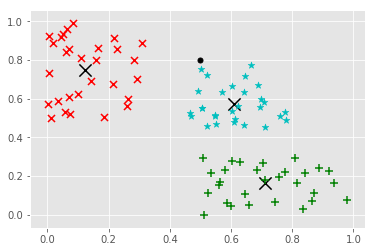

In [148]:
#================================================================================================================
#----------------------------------------------------------------------------------------------------------------
#									K MEANS CLUSTERING
#----------------------------------------------------------------------------------------------------------------
#================================================================================================================

# K means clustering is applied to normalized ipl player data

# http://madhugnadig.com/articles/machine-learning/2017/03/04/implementing-k-means-clustering-from-scratch-in-python.html

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

class K_Means:
    def __init__(self, k=3, tolerance = 0.0001, max_iterations = 500):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations

    def fit(self, data):

        self.centroids = {}

        #initialize the centroids, the first 'k' elements in the dataset will be our initial centroids
        for i in range(self.k):
            self.centroids[i] = data[i]

        #begin iterations
        for i in range(self.max_iterations):
            self.classes = {}
            for i in range(self.k):
                self.classes[i] = []
                
            #find the distance between the point and cluster; choose the nearest centroid
            for feature in data:
                distances = [np.linalg.norm(feature - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classes[classification].append(feature)
            
            previous = dict(self.centroids)

            #average the cluster datapoints to re-calculate the centroids
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis = 0)

            isOptimal = True

            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]
                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False

            #break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
            if isOptimal:
                break

    def pred(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

def main():

    df = pd.read_csv(r"./data/ipl.csv")
    df = df[['one', 'two']]
    #print(df)
    dataset = df.astype(float).values.tolist()
    #print(dataset)
    X = df.values #returns a numpy array
    #print(X)
    
    km = K_Means(3)
    km.fit(X)

    # Plotting starts here
    colors = 10*["r", "g", "c", "b", "k"]
    markers = ["x", "+", "*"]

    for centroid in km.centroids:
        plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], color="black", s = 150, marker = "x")

    for classification in km.classes:
        color = colors[classification]
        markerr = markers[classification]
        for features in km.classes[classification]:
            plt.scatter(features[0], features[1], color = color, s = 50, marker=markerr)

    classification1=km.pred([0.1,0.1]);
    print("{}th cluster".format(classification1+1));
    plt.plot([0.5], [0.8], marker='o', markersize=5, color="black")
    
    
if __name__ == "__main__":
    main()
